# **QUIZ 2**


MINE-4101: Ciencia de Datos Aplicada<br>
Universidad de los Andes  

Ivan Saavedra <br>

In [ ]:
!pip install --upgrade pandas-profiling

In [ ]:
!pip install markupsafe==2.0.1

In [185]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

# **Punto 1**

### Reading the dataset

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/ivanrsv85/quiz_2/main/insurance.csv')

In [66]:
df.shape

(1338, 7)

In [67]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Profiling the data

In [69]:
profile = ProfileReport(df)

In [70]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Transforming categoric features

In [109]:
#Reemplazando valores categóricos de sex
df['sex'] = df['sex'].replace(['male', 'female'],[1, 0])

In [110]:
#Reemplazando valores categóricos de region
df['region'] = df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],[1, 2, 3, 4])

In [111]:
#Reemplazando valores categóricos de sex
df['smoker'] = df['smoker'].replace(['yes', 'no'],[1, 0])

In [112]:
#Comprobando las transformaciones
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [113]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

### Analyzing the target

In [114]:
df['charges'].describe(percentiles = [.25, .5, .75, .95, .99])

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
95%      41181.827787
99%      48537.480726
max      63770.428010
Name: charges, dtype: float64

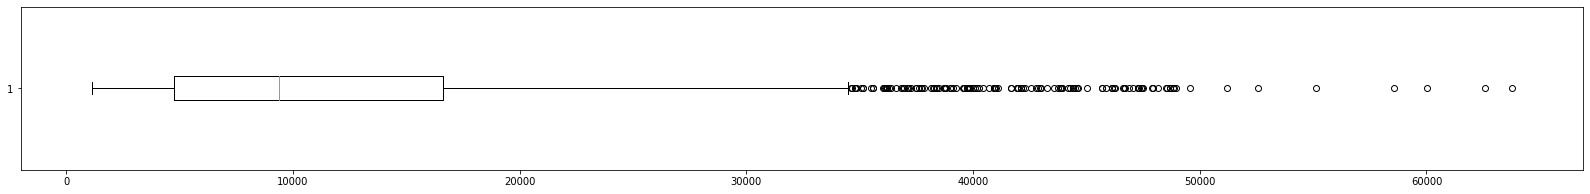

In [115]:
plt.figure(figsize = (28, 3))
plt.boxplot(df['charges'], vert = False)
plt.show()

In [116]:
no_outliers_df = df.loc[df['charges'] <= df['charges'].quantile(.95)]

In [117]:
no_outliers_df.shape

(1271, 7)

In [137]:
no_outliers_df['charges'].describe(percentiles = [.25, .5, .75, .95, .99])

count     1271.000000
mean     11514.249218
std       9571.887536
min       1121.873900
25%       4540.246900
50%       8825.086000
75%      14126.328875
95%      35153.831525
99%      39905.220795
max      41097.161750
Name: charges, dtype: float64

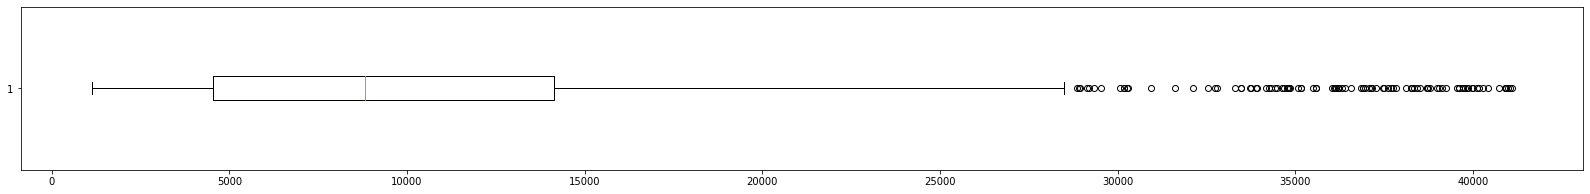

In [118]:
plt.figure(figsize = (28, 3))
plt.boxplot(no_outliers_df['charges'], vert = False)
plt.show()

### Features to train the model

In [119]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [120]:
no_outliers_df[features + ['charges']].corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.032917,0.083753,0.045464,-0.124355,0.003480,0.244682
sex,0.032917,1.000000,-0.038398,-0.007205,-0.062140,0.001069,-0.037306
bmi,0.083753,-0.038398,1.000000,0.002289,-0.122518,-0.156392,0.062299
children,0.045464,-0.007205,0.002289,1.000000,-0.005417,-0.019598,0.070098
smoker,-0.124355,-0.062140,-0.122518,-0.005417,1.000000,0.016065,0.729805
region,0.003480,0.001069,-0.156392,-0.019598,0.016065,1.000000,0.031047
charges,0.244682,-0.037306,0.062299,0.070098,0.729805,0.031047,1.000000


### Splitting train and test datasets

In [121]:
X = no_outliers_df[features]

In [122]:
Y = no_outliers_df['charges']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [124]:
X_train.shape

(1016, 6)

In [125]:
X_test.shape

(255, 6)

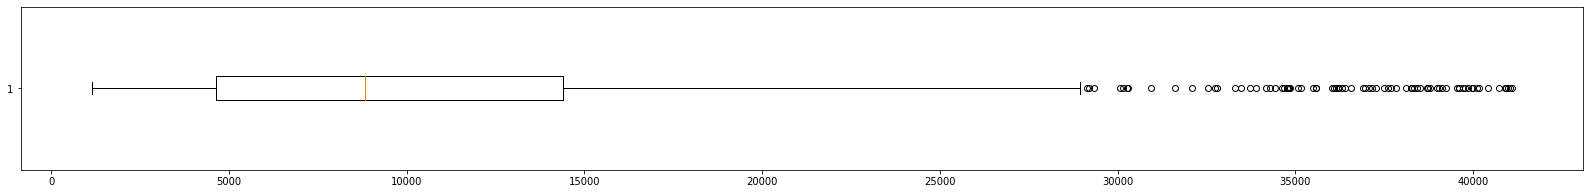

In [126]:
plt.figure(figsize = (28, 3))
plt.boxplot(Y_train, vert = False)
plt.show()

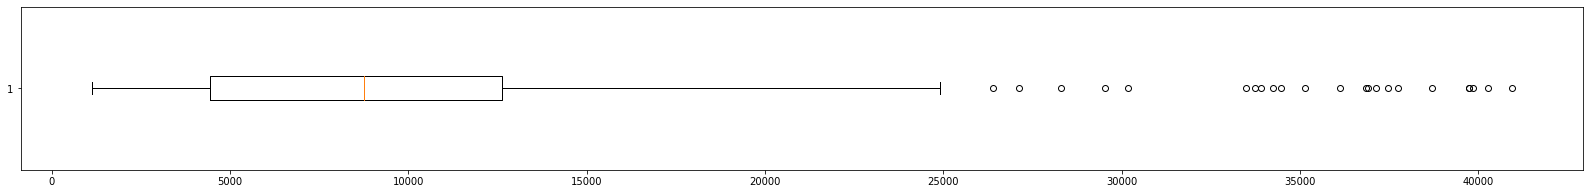

In [127]:
plt.figure(figsize = (28, 3))
plt.boxplot(Y_test, vert = False)
plt.show()

### Scaling features

In [128]:
scaler = StandardScaler()

In [129]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the model

In [131]:
regr = LinearRegression()

In [132]:
regr.fit(X_train_scaled, Y_train)

LinearRegression()

In [133]:
regr.coef_

array([ 3.09569730e+03, -1.80153782e+00,  1.33893962e+03,  5.70345559e+02,
        7.44391222e+03,  3.65127576e+02])

In [134]:
regr.intercept_

11698.853597972442

### Evaluating the model

In [135]:
preds_train = regr.predict(X_train_scaled)
preds_test = regr.predict(X_test_scaled)

In [136]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(3793.173782147454, 3429.0082654830635)

In [138]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(5669.211457575578, 4830.850386151227)

### Error analysis

In [139]:
(Y_test - preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count      255.000000
mean      -946.613890
std       4746.513261
min      -9321.109175
25%      -3127.946630
50%      -1852.415729
75%       -397.124713
95%      10181.119463
99%      15870.557936
max      19896.289670
Name: charges, dtype: float64

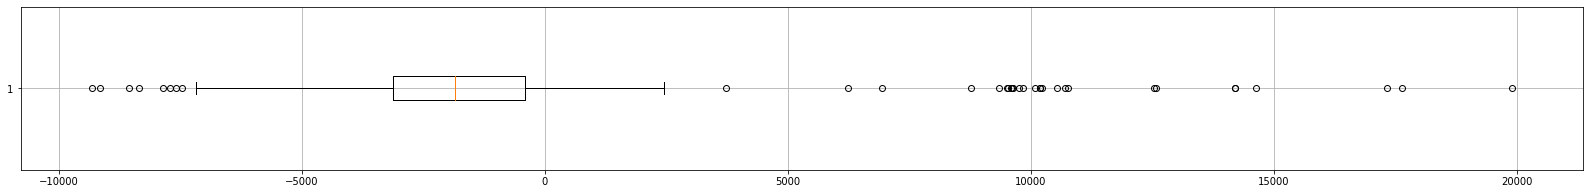

In [140]:
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - preds_test), vert = False)
plt.grid()
plt.show()

# **Punto 2**
## a
### i.
No es aceptable el error obtenido porque el MAE es de 3429 para los valores de prueba mientras que el costo promedio del dataset original es de 13000. Esto quiere decir que el MAE es de aprox. 25% el costo promedio lo cual es alto.

### iii
No hay evidencia de overfitting pero sí hay evidencia de underfitting dado que estamos haciendo una regresión lineal y la varianza es alta ya que la desviación estándar del Y_test - preds_test es de 4746

### Training the polinomial second degree model

In [145]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [158]:
X_poly_train = poly_features.fit_transform(X_train_scaled)

In [159]:
X_poly_test = poly_features.fit_transform(X_test_scaled)

In [160]:
poly_reg_model = LinearRegression()

In [161]:
poly_reg_model.fit(X_poly_train, Y_train)

LinearRegression()

In [162]:
poly_reg_model.coef_

array([ 3.41966077e+03, -2.01078890e+12,  1.55587428e+03,  1.10165790e+03,
        5.03533169e+14,  4.99391374e+02,  7.83518708e+02, -1.16262611e+02,
       -1.58804659e+01,  1.61652985e+01, -3.37369201e+02, -1.13805392e+02,
       -1.27681137e+14, -1.62893765e+02,  2.91173958e+01,  4.08911757e+01,
       -8.84483419e+01, -1.42890869e+02,  8.38620605e+01,  3.08102637e+03,
        1.73916246e+02, -1.84672188e+02,  3.05611115e+01,  2.24587210e+02,
       -2.76525693e+14, -6.59933777e+01,  2.20725277e+02])

In [163]:
poly_reg_model.intercept_

404206829397128.25

### Evaluating the model

In [164]:
poly_preds_train = poly_reg_model.predict(X_poly_train)
poly_preds_test = poly_reg_model.predict(X_poly_test)

In [165]:
mean_absolute_error(Y_train, poly_preds_train), mean_absolute_error(Y_test, poly_preds_test)

(2946.584196889764, 2402.3876261529413)

In [166]:
np.sqrt(mean_squared_error(Y_train, poly_preds_train)), np.sqrt(mean_squared_error(Y_test, poly_preds_test))

(4771.709697415696, 3636.812121018598)

### Error analysis

In [167]:
(Y_test - poly_preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count      255.000000
mean      -660.743623
std       3583.318837
min      -7102.545000
25%      -1898.753200
50%      -1458.150100
75%      -1037.958800
95%       6154.601745
99%      15743.148867
max      20581.409390
Name: charges, dtype: float64

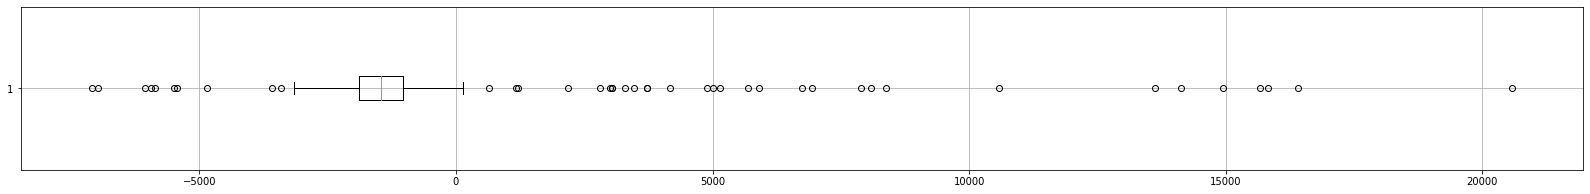

In [183]:
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - poly_preds_test), vert = False)
plt.grid()
plt.show()

### Training the polinomial third degree model

In [169]:
poly_features3 = PolynomialFeatures(degree = 3, include_bias = False)

In [173]:
X_poly_train3 = poly_features3.fit_transform(X_train_scaled)

In [174]:
X_poly_test3 = poly_features3.fit_transform(X_test_scaled)

In [175]:
poly_reg_model3 = LinearRegression()

In [176]:
poly_reg_model3.fit(X_poly_train3, Y_train)

LinearRegression()

In [177]:
poly_reg_model3.coef_

array([-8.65191223e+09, -8.80306176e+13, -1.24547369e+12, -3.26152475e+12,
        7.75055096e+14, -2.89013417e+13,  9.35233576e+02, -4.16620590e+12,
       -4.58568745e+01, -3.00937245e+02, -4.81734543e+14, -1.93809884e+02,
       -5.33994157e+14,  6.13360349e+11,  1.88010845e+12,  6.12887246e+14,
        4.63912753e+11,  8.40954591e+01,  1.25572119e+02,  6.86520549e+13,
        2.03540796e+02, -2.18333243e+02,  2.11449096e+14,  5.24353224e+02,
        6.57504933e+13,  1.01280874e+12,  1.99894383e+02, -2.61482461e+02,
        1.19827847e+02, -7.87709808e+01,  3.81396011e+02, -4.54445348e+02,
       -3.14921464e+01, -2.64545873e+14,  1.20390625e+02, -3.05468750e+01,
       -1.20312500e+02, -9.21875000e-01,  7.82187500e+01,  2.22265625e+02,
        2.73281250e+01,  5.14687500e+01,  2.35625000e+02, -4.46875000e+00,
       -3.06625000e+02,  2.64554525e+14,  1.95171875e+02, -9.20781250e+01,
        4.10904918e+14,  3.89471748e+13,  1.19383186e+14,  6.00549151e+14,
        2.94575466e+13, -

In [178]:
poly_reg_model3.intercept_

1105630115041776.1

### Evaluating the model

In [179]:
poly_preds_train3 = poly_reg_model3.predict(X_poly_train3)
poly_preds_test3 = poly_reg_model3.predict(X_poly_test3)

In [180]:
mean_absolute_error(Y_train, poly_preds_train3), mean_absolute_error(Y_test, poly_preds_test3)

(2825.208023464567, 2575.7199951725493)

In [181]:
np.sqrt(mean_squared_error(Y_train, poly_preds_train3)), np.sqrt(mean_squared_error(Y_test, poly_preds_test3))

(4643.928019048177, 3891.148960245979)

### Error analysis

In [182]:
(Y_test - poly_preds_test3).describe(percentiles = [.25, .5, .75, .95, .99])

count      255.000000
mean      -856.152937
std       3803.257414
min      -8748.670000
25%      -2214.230050
50%      -1540.668100
75%       -885.747150
95%       7974.512385
99%      15726.434619
max      20476.596890
Name: charges, dtype: float64

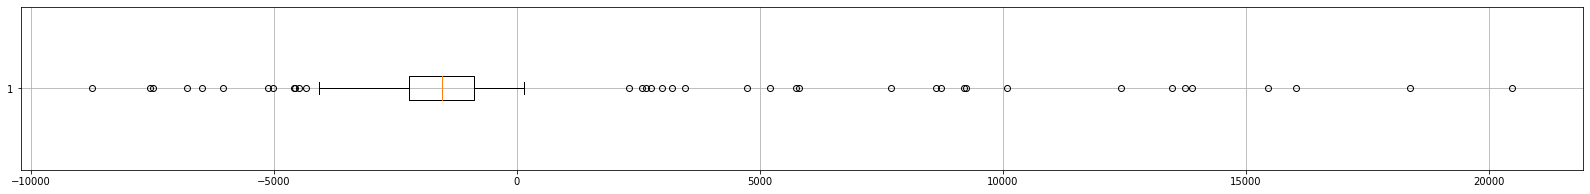

In [184]:
plt.figure(figsize = (28, 3))
plt.boxplot((Y_test - poly_preds_test3), vert = False)
plt.grid()
plt.show()

Con los modelos de regresión polinomica de grado 2 y grado 3 se disminuye el error aunque sus valores continúan siendo altos

## Ridge Regularization 

In [186]:
ridge_reg1 = Ridge(alpha=0.1, solver="cholesky")
ridge_reg1.fit(X_poly_train, Y_train)

Ridge(alpha=0.1, solver='cholesky')